# Regresion Logistica

Este tipo de tecnicas funciona bien cuando, la variable dependiente, es decir, la columna objetivo contiene valores discretos. <br>

Este tipo de problemas se conocen como _**problemas de clasificacion**_. En la clasificacion, la columna objetivo tiene un conjunto <br>
limitado de valores posibles que representan diferentes categorias. Para seguir utilizando funciones matematicas, se utiliazan numeros <br>
enteros para representar las diferentes categorias.


Por ahora nos centraremos en la _**clasificacion binaria**_, donde solo existen dos valores:
- **0 corresponde a la condicion de Falso**.
- **1 corresponde a la condicion de Verdadero**.

### Estimacion de Probabilidades.

Al igual que la _Regresion Lineal_, un modelo de _**Regresion Logistica**_ calcula una suma ponderada de las caracteristicas de entrada ( mas el termino _bais_ ), pero la salida es la _logistica_ del resultado: $$ \widehat{p} = h_{\mathbf{\theta}}(\mathbf{x}) = \sigma(\mathbf{x}^{T}\cdot\mathbf{\theta}) $$

La logistica &mdash; anotada como: $ \sigma(\cdot) $ &mdash; es la _**Funcion sigmoid**_, la cual regresa un numero entre 0 y 1, y se define de la siguiente manera: $$ \sigma(t) = \frac{1}{1 + e^{-t}} $$

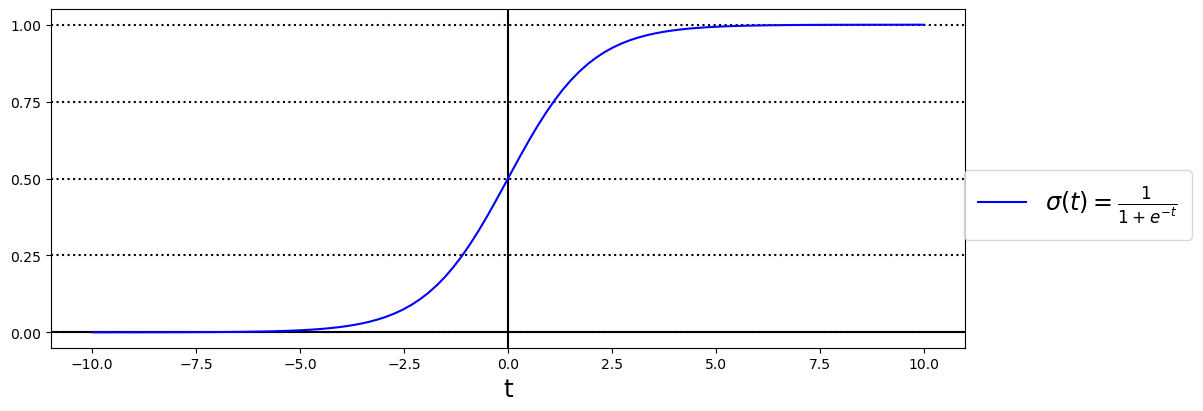

In [52]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 100)
log_fun = 1 / (1 + np.exp(-t))


fig, axs = plt.subplots(layout='constrained', figsize=(12,4))
plt.yticks([ n * 0.25 for n in range(0,5)] )
plt.grid(True,
        axis = 'y',
        zorder = 0,
        linestyle = ':',
        linewidth = 1.5,
        color = 'k')
axs.axvline(0, color='black',)
axs.axhline(0, color='black',)
axs.plot(t, log_fun, 'b-', label=r'$ \sigma(t) = \frac{1}{1 + e^{-t}} $')
fig.legend(loc='outside right', ncols=1, fontsize='xx-large', borderpad=0.6,)
axs.set_xlabel('t', fontsize=18)
plt.show()

 Tomando en cuenta la que $ \mathbf{x}\cdot\mathbf{\theta} $ es igual a &nbsp; $ \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + ... + \theta_{n}x_{n} $ podemos reescribir la ecuacion de la _Regresion lineal_ como: $$ \widehat{p} = h_{\mathbf{\theta}}(\mathbf{x}) = \sigma(\mathbf{x}^{T }\cdot\mathbf{\theta}) = \frac{1}{1 + e^{-(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + ... + \theta_{n}x_{n})}} = \frac{1}{1 + e^{-\left(\theta_{0} + \sum\limits_{n=1}^{N}\theta_{n}x_{n} \right)}} $$

Una vez que el modelo de _**Regresion Logistica**_ ha estimado la probabilidad $ \widehat{p} = h_{\mathbf{\theta}}(\mathbf{x}) $ de que una instancia de $ \mathbf{x} $ pertenezca a la clase positiva, la prediccion $ \widehat{y} $ puede hacerse facilmente: $$ \widehat{y} = \begin{cases} 0 \quad \mathsf{si} \quad \widehat{p} < 0.5\\ 1 \quad \mathsf{si} \quad \widehat{p} \ge 0.5 \end{cases} $$ 

Como se puede ver, $ \;\; \sigma(t) < 0.5 \;$ cuando $ \; t < 0 \; $ y $ \; \sigma(t) \ge 0.5 \;$ cuando $ \; t \ge 0 \; $, por lo que un modelo _Regresion Logistica_ predice $ \; 1 \; \mathsf{si} \; \mathbf{x}^{T}\cdot\mathbf{\theta} \;$ es positivo, y $ \; 0 \; $ si es negativo.

In [34]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

### Entrenamiento

El objetivo del entrenamiento es encontrar el vector $ \; \mathbf{\theta} \; $, tal que maximise el el rendimiento del modelo. Existen dos formas comunes de alcanzar esta optimizacion:
1. A traves de la llamada **Loss minimizing** con el uso del _gradient descent_.
2. La otra es usando lo que se conoce como **Maximum Likelihood Estimation**. 

#### 1. Loss minimizing

Los _pesos_ (representados por $ \theta $) es una parte vital para la _Regresion Logistica_ y otros algoritmos de ML y el proposito, siempre es encontrar los mejores valores para ellos. <br>

Para encontrarlos, al inicio se toman valores aleatorios y se mide el desempeño del algoritmo usando esos valores. Para ello se utiliza la **funcion de perdida (_loss function_)**:  $$ h = sigmoid(X \cdot \theta) = \sigma(X \cdot \theta) $$ $$ loss(\theta) = J(\theta) = \frac{1}{m} \cdot [-y^{T}log(h)-(1-y)^{T}log(1-h)] $$

Donde: 
- $ m \;$ es el numero de muestras.
- $ y \;$ es la clase o atributo objetivo.

In [35]:
def loss(h, y):
    return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

El objetivo siempre es como ya mencionamos, es encontrar los mejores valores, es decir **minimizar las perdidas**, lo cual se logra incrementando o disminuyendo los _pesos_ ($ \theta $), esto es comunmente conocido como _**fitting**_. Pero ¿cuales pesos deberian ser mas grandes y cuales mas pequeños? Pues con ayuda de la funcion llamada **Gradiente descendente (_Gradient descent_)**. El cual es la derivada de la funcion de perdida _loss function_ con respecto a los _pesos_ ($ \partial{\theta} $): $$ gd(\theta) =  \frac{\partial{J(\theta)}}{\partial{\theta}} = \frac{1}{m} \cdot X^{T}(\sigma(X\theta)-y) $$

Y ahora con esto, actualizamos los _pesos_ ($ \theta $): $$ \theta := \theta - \alpha \cdot \frac{\partial{J(\theta)}}{\partial{\theta}} $$

Donde: 
- $ \alpha \;$ es la taza de aprendizaje (usualmente $ 0.1 $).

In [36]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

#### 2. Maximum Likelihood estimation.

Aqui el objetivo es _**maximizar la probabilidad**_, lo cual podemos conseguir con el _"Gradiente ascendente"_. El cual es el mismo que el _Gradiente descendente_, excepto que el objetivo aqui es **maximizar** la funcion en lugar de minizarlo: $$ LL = y \cdot z - log(1 + e^{z}) $$ 

Donde:
- $ z \;$ es $ \quad \mathbf{x}^T \cdot \theta $.

In [37]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y * z - np.log(1 + np.exp(z)) )
    return ll

Ahora, el gradiente de $\; LL \;$ es la derivada de esa funcion: $$ \nabla{LL} = X^{T} \cdot (y - \sigma(X \cdot \theta)) $$ 

Y entonces actualizamos los _pesos_ ($ \theta $), pero ahora adicionando la multiplicacion del gradiente por la taza de aprendizaje: $$ \theta := \theta + \alpha \cdot \frac{\partial{LL}}{\partial{\theta}} $$

In [38]:
def gradient_ascent(X, h, y ):
    return np.dot(X.T, (y-h))

def update_weight_mle(weight, learning_rate, gradient):
    return weight + (learning_rate * gradient)

#### Conclusion

1. Se aprendio que la **Regresion Logistica** es un algoritmo de _**Clasificacion**_, ya que la salida es un numero entre 0 y 1.
2. Se comprendio dos maneras comunes de _optimizar_ la Regresion Logistica, **minimizando la perdida** y **maximizando la probabilidad**.
3. Se vio la _diferencia_ entre **Gradiente descendente** y **Gradiente ascendente**.

### Logistic Regresion en accion.

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

In [61]:
# Importando data set

from sklearn import metrics
from sklearn.datasets import load_iris

iris = load_iris()
# print(iris.keys())
# print(iris["target"])
# print(iris["target_names"])

X = iris['data'][:, 3:]                # Extrayendo el 'ancho del petalo'.
y = (iris["target"] == 2 ).astype(int) # 1 si es Iris-Virginica, 0 de otra manera

print(X[:20]) 
print(y)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [62]:
class LogisticRegresion:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.c_[intercept, X]
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # Inicializacion de los 'pesos'
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.theta -= self.lr * gradient

            if(self.verbose and i % 50000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)}')

    def __predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.__predict_prob(X) >= threshold
    

In [63]:
import time

start_time = time.time()

log_reg = LogisticRegresion(lr=0.1, num_iter=300000, verbose=True)
log_reg.fit(X, y)

print(f"Training time (Log Reg using Loss minimizing): {(time.time() - start_time):.3f} seconds")

predictions = log_reg.predict(X)

accuracy = (predictions == y).mean()
print(f'Accuracy = {accuracy}')

loss: 0.6898081929359506
loss: 0.11239337680527224
loss: 0.11147747313120024
loss: 0.11140969325721561
loss: 0.11140338775503826
loss: 0.11140276423286986
Training time (Log Reg using Loss minimizing): 7.592 seconds
Accuracy = 0.96


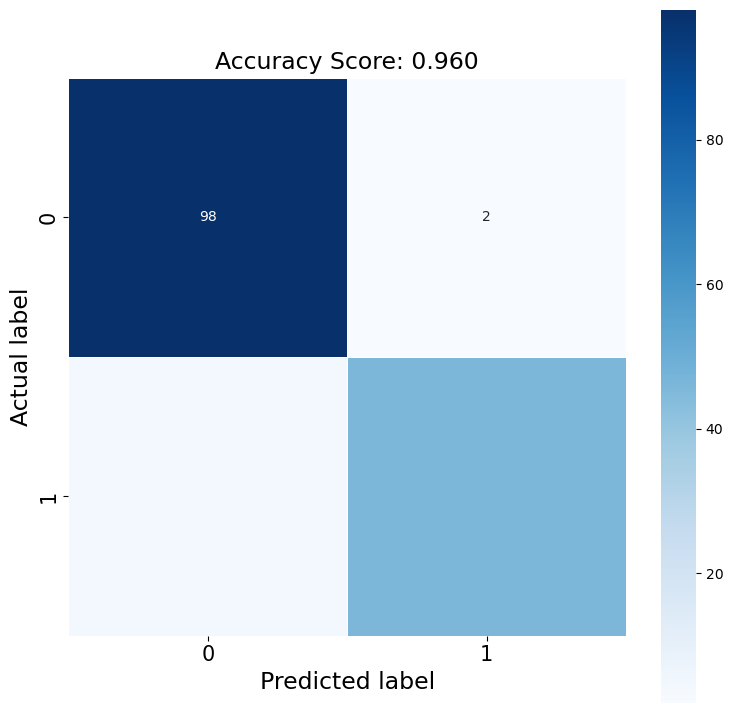

In [91]:
cm = metrics.confusion_matrix(y, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues')
plt.ylabel('Actual label', fontsize = 17)
plt.xlabel('Predicted label', fontsize = 17)
plt.title(f'Accuracy Score: {accuracy:.3f}', size = 17)
plt.tick_params(labelsize= 15)

##### Usando Scikit-learn

In [65]:
from sklearn.linear_model import LogisticRegression

log_reg_skl = LogisticRegression(max_iter=300000)

In [66]:
# Ajustando el modelo
log_reg_skl.fit(X, y)

# Haciendo predicciones
predictions = log_reg_skl.predict(X)
print(predictions)

log_predictions = pd.DataFrame(log_reg_skl.predict_proba(X))[1]

accuracy = (predictions == y).mean()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


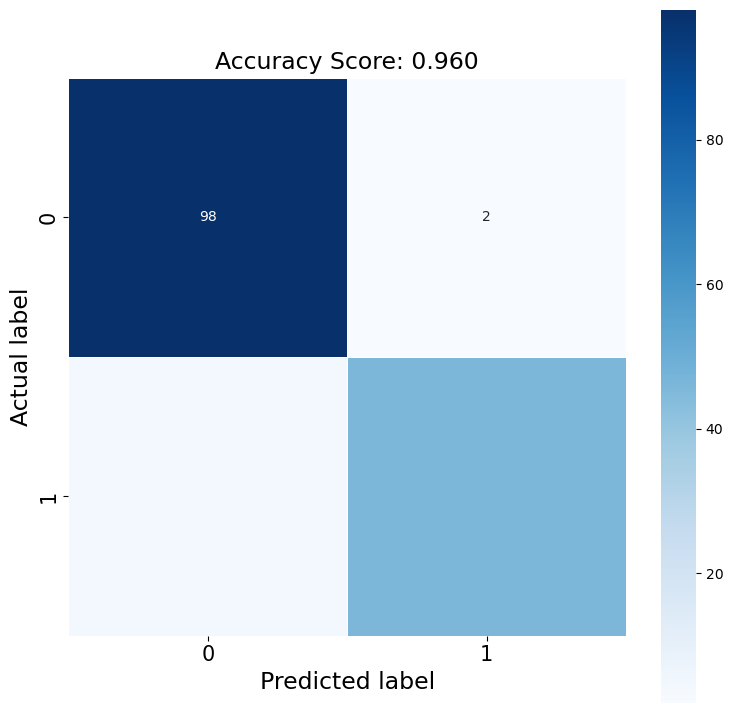

In [92]:
# Visualizacion de los resultados
cm = metrics.confusion_matrix(y, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues')
plt.ylabel('Actual label', fontsize = 17)
plt.xlabel('Predicted label', fontsize = 17)
plt.title(f'Accuracy Score: {accuracy:.3f}', size = 17)
plt.tick_params(labelsize= 15)

In [89]:
example_df = pd.DataFrame()
example_df.loc[:, 'petal width (cm)'] = pd.Series(X.reshape(-1))
example_df.loc[:, 'target'] = y
example_df['logistic_preds'] = log_predictions

example_df.head(10)

,petal width (cm),target,logistic_preds
0,0.2,0,0.001782
1,0.2,0,0.001782
2,0.2,0,0.001782
3,0.2,0,0.001782
4,0.2,0,0.001782
5,0.4,0,0.004229
6,0.3,0,0.002746
7,0.2,0,0.001782
8,0.2,0,0.001782
9,0.1,0,0.001156


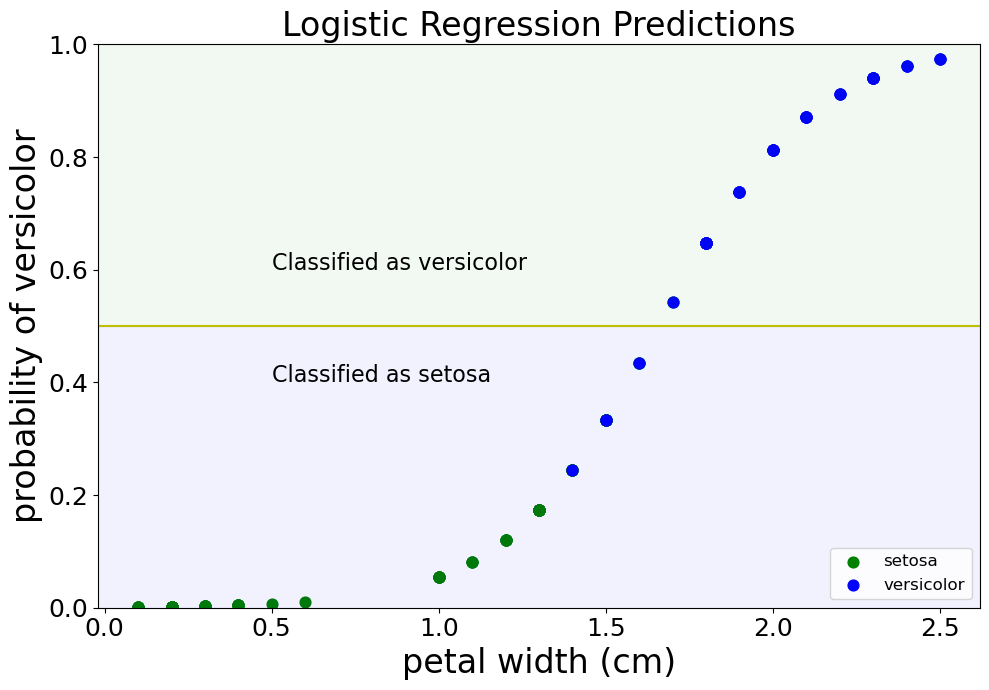

In [93]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


versicolorFilter = example_df['target'] == 1
setosaFilter = example_df['target'] == 0


ax.scatter(example_df.loc[setosaFilter, 'petal width (cm)'].values,
            example_df.loc[setosaFilter, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'setosa')


ax.scatter(example_df.loc[versicolorFilter, 'petal width (cm)'].values,
            example_df.loc[versicolorFilter, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'versicolor')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as versicolor', fontsize = 16)
ax.text(0.5, .4, 'Classified as setosa', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('petal width (cm)', fontsize = 24)
ax.set_ylabel('probability of versicolor', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()